#### **Machine Learning Modeling**

Based on objectives, the appropriate machine learning model for this project is **event detection**. Event detection is a suitable model for analyzing the level of engagement and changes over time in tweets spreading misinformation or disinformation about the alleged sale of Scarborough Shoal by Noynoy Aquino and Trillanes.

Here's an in-depth explanation of why event detection is the appropriate model for this project:

1. **Analyzing Engagement**: The aim of the project is to investigate the level of engagement generated by tweets spreading misinformation/disinformation about the alleged sale of Scarborough Shoal. Event detection models are designed to identify and analyze significant events or occurrences in a dataset. In this case, the events of interest are the tweets related to misinformation/disinformation. By applying event detection techniques, you can identify and study these specific events and their associated engagement metrics.

2. **Temporal Analysis**: The research question involves understanding how engagement changes over time. Event detection models can effectively handle temporal analysis by detecting events and their timestamps. By analyzing the events' temporal distribution and examining the associated engagement metrics, you can gain insights into how engagement varies over time in relation to the spread of misinformation/disinformation.

3. **Hypothesis Testing**: The project includes two hypotheses related to engagement metrics. Event detection models can help validate these hypotheses by identifying the events (tweets spreading misinformation/disinformation) and comparing the engagement metrics (likes, replies, retweets, and quote tweets) within these events. By analyzing the event-specific engagement patterns, you can assess the support or contradiction of the hypotheses.

4. **Dataset Features**: The provided dataset contains relevant fields such as "Tweet," "Likes," "Replies," "Retweets," and "Quote Tweets." Event detection models can utilize these features to identify and analyze the events of interest. The temporal information in the "Date posted" field can also be used to perform time-based analysis.

By employing event detection techniques, you can effectively detect and analyze the events related to tweets spreading misinformation/disinformation about the alleged sale of Scarborough Shoal. This model allows for the examination of engagement metrics, temporal analysis, hypothesis testing, and utilization of the dataset features, thereby addressing the research question and hypotheses in your project.

##### **Choosing The Appropriate Time Series Analysis Model**

**Change Point Detection** is an appropriate model for our project because it is specifically designed to identify significant changes in engagement levels over time. We are interested in analyzing the engagement metrics of tweets spreading misinformation and determining if there are any changes or trends in these metrics.

By utilizing **Change Point Detection**, we can pinpoint specific time points where there is a noticeable shift in engagement patterns. This will enable us to identify any substantial changes in the engagement levels of tweets spreading misinformation, such as sudden increases or decreases in engagement following the release of fact-checking articles. This analysis will be crucial in evaluating our hypotheses and gaining insights into the dynamics of engagement over time.

Although **Peak Finding** and **Anomaly Detection using Isolation Forest** have their merits in certain contexts, they may not directly address our project goals of analyzing changes or trends in engagement levels over time. **Peak Finding** primarily focuses on identifying the highest or lowest points in a time series, which may not provide us with a comprehensive understanding of temporal patterns. On the other hand, **Anomaly Detection using Isolation Forest** is better suited for detecting unusual or outlier behavior in a time series, which may not align with our specific objective of identifying significant changes or trends.

Considering these factors, we conclude that **Change Point Detection** is the most suitable model among the given options for our project. It will allow us to effectively analyze engagement levels and detect significant changes over time, helping us gain valuable insights into the dynamics of misinformation spread on Twitter.

##### **Structure and Mechanism of the Chosen Model**

**Change Point Detection** is a statistical modeling technique used to identify points or periods in a time series where there is a significant change in the underlying data distribution or behavior. The goal of this model is to detect these change points, which indicate shifts in engagement levels over time in the context of your project.

The structure and mechanism of a Change Point Detection model typically involve the following steps:

1. **Data Preprocessing**: Prepare the engagement data of tweets spreading misinformation for analysis. This may involve cleaning the data, handling missing values, and organizing the data in a suitable time series format.

2. **Statistical Modeling**: Apply a statistical algorithm or method that is designed to detect change points. There are several approaches available, such as Bayesian methods, likelihood-based methods, or non-parametric methods. One commonly used method is the Bayesian Change Point Detection algorithm, which uses Bayesian inference to estimate the likelihood of change points in the time series.

3. **Parameter Selection**: Set appropriate parameters for the model, such as the prior distribution, the number of potential change points, and the sensitivity of the model to detect changes. These parameters will affect the performance and accuracy of the Change Point Detection algorithm.

4. **Change Point Detection**: Apply the chosen statistical algorithm to the engagement time series data. The algorithm will analyze the data and identify time points where significant changes occur in the engagement levels. These change points can represent shifts in user behavior, the impact of external events, or the effectiveness of fact-checking articles.

5. **Visualization and Interpretation**: Once the change points are detected, visualize the results by plotting the engagement time series and indicating the identified change points. This will provide a visual representation of the detected shifts in engagement levels over time. Interpret the detected change points and analyze their implications in relation to your research question and hypotheses.

6. **Validation and Refinement**: Validate the detected change points by comparing them with known events or external factors that could potentially influence engagement levels. Assess the performance of the model and refine the parameters if necessary to improve the accuracy of detecting change points.

By following these steps, the Change Point Detection model will help us identify and analyze significant changes in engagement levels over time. It provides a statistical framework to uncover shifts in engagement patterns, allowing us to gain insights into the dynamics of misinformation spread on Twitter and evaluate our research hypotheses.

##### **Performing the Change Point Model on the dataset**

**Step 0: Library Imports**

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from ruptures import Pelt
from scipy.stats import shapiro, linregress, wilcoxon

**Step 1: Data Preprocessing**

In [154]:
# Load the dataset into your programming environment
dataset = pd.read_csv('../../Data Exploration/cleaned_dataset.csv')

# Remove irrelevant columns
columns_to_drop = ['ID', 'Tweet URL', 'Account handle', 'Account name', 'Account type', 'Tweet Translated', 'Tweet Type', 'Likes_zscore', 'Replies_zscore', 'Retweets_zscore', 'Quote Tweets_zscore', 'Account_Anonymous', 'Account_Identified', 'Removed any special characters and urls', 'Tokenized Tweet', 'Stemmed Tweet', 'Lemmatized Tweet']
dataset = dataset.drop(columns_to_drop, axis=1)

# Handle missing values
dataset = dataset.dropna()

# Ensure proper formatting and data types
dataset['Date posted'] = pd.to_datetime(dataset['Date posted'])

**Step 2: Feature Engineering**

Results of the normality test
Shapiro-Wilk test statistic: 0.48021775484085083
p-value: 1.5140927189672292e-20

Results of the linearity test
R-squared: 0.0009901859064080302
p-value: 0.707118351727878


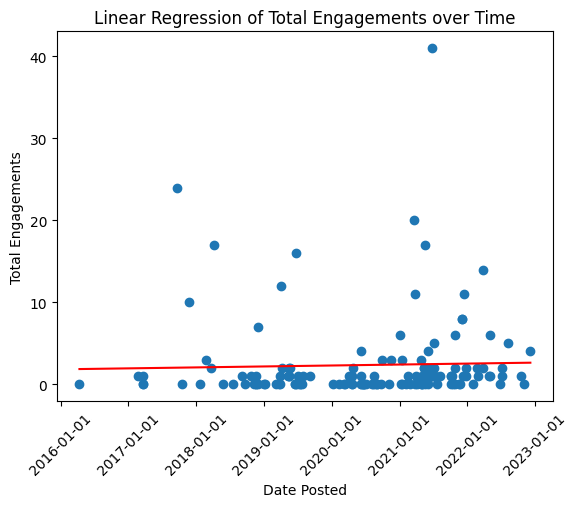

In [155]:
# Calculate total engagements
dataset['Total Engagements'] = dataset['Likes'] + dataset['Replies'] + dataset['Retweets'] + dataset['Quote Tweets']

# Calculate engagement rate per tweet
dataset['Engagement Rate'] = dataset['Total Engagements'] / len(dataset)

# check if engagement levels follow a Gaussian distribution with constant variance
statistic, p_value = shapiro(dataset['Total Engagements'])
print('Results of the normality test')
print('Shapiro-Wilk test statistic:', statistic)
print('p-value:', p_value)
print()

# Linearity test
x = mdates.date2num(dataset['Date posted'])  # Convert the date to a numeric representation
y = dataset['Total Engagements']  # Dependent variable

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print('Results of the linearity test')
print('R-squared:', r_value ** 2)
print('p-value:', p_value)

# Plotting the data and regression line
fig, ax = plt.subplots()
ax.scatter(dataset['Date posted'], dataset['Total Engagements'])
ax.plot(dataset['Date posted'], slope * x + intercept, color='red')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlabel('Date Posted')
plt.ylabel('Total Engagements')
plt.title('Linear Regression of Total Engagements over Time')
plt.xticks(rotation=45)
plt.show()

**Step 3: Change Point Detection**

In [156]:
# Perform Change Point Detection using Pelt algorithm
algo = Pelt(model="clinear").fit(dataset['Total Engagements'].values)
result = algo.predict(pen=35)

**Step 4: Visualization and Analysis**

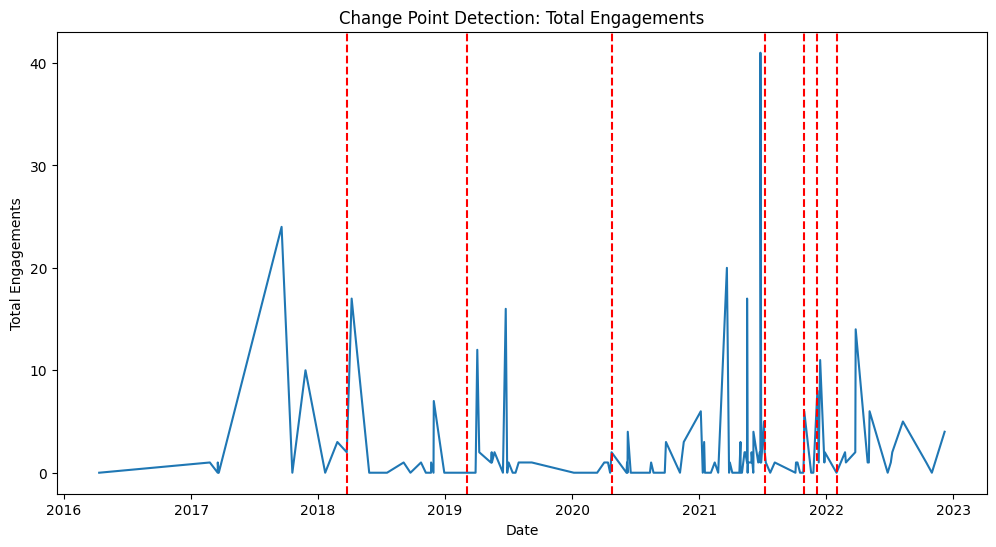

Change Point Detected at 2018-03-24 11:06:00
Average Engagement before: 3.90
Average Engagement after: 2.24
--------------------------------------
Change Point Detected at 2019-03-05 13:42:00
Average Engagement before: 2.72
Average Engagement after: 2.29
--------------------------------------
Change Point Detected at 2020-04-23 15:14:00
Average Engagement before: 2.04
Average Engagement after: 2.55
--------------------------------------
Change Point Detected at 2021-07-07 22:07:00
Average Engagement before: 2.32
Average Engagement after: 2.47
--------------------------------------
Change Point Detected at 2021-10-28 23:28:00
Average Engagement before: 2.18
Average Engagement after: 3.21
--------------------------------------
Change Point Detected at 2021-12-06 10:15:00
Average Engagement before: 2.22
Average Engagement after: 2.89
--------------------------------------
Change Point Detected at 2022-01-30 09:18:00
Average Engagement before: 2.32
Average Engagement after: 2.86
----------

In [157]:
# Visualize the detected change points
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date posted'], dataset['Total Engagements'])
for cp in result:
    if cp < len(dataset['Date posted']):
        plt.axvline(x=dataset['Date posted'].values[cp], color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Engagements')
plt.title('Change Point Detection: Total Engagements')
plt.show()

# Analyze the change points and calculate statistics
for cp in result:
    if cp == result[-1]:
        break
    start_index = cp
    end_index = cp + 1
    segment = dataset.iloc[start_index:end_index]
    avg_engagement_before = dataset['Total Engagements'][:start_index].mean()
    avg_engagement_after = dataset['Total Engagements'][end_index:].mean()
    change_point_date = dataset.iloc[start_index]['Date posted']
    print(f"Change Point Detected at {change_point_date}")
    print(f"Average Engagement before: {avg_engagement_before:.2f}")
    print(f"Average Engagement after: {avg_engagement_after:.2f}")
    print("--------------------------------------")

##### **Evaluating the model's performance using the appropriate evaluation metrics**

When ground truth information about actual change points is unavailable, evaluating the performance of a change point detection model becomes more challenging. However, there are unsupervised methods that can be adopted to assess the results of the model.

One such method is visual inspection, where the engagement of tweets is plotted over time along with the detected change points. This allows for a qualitative assessment of whether the detected change points align with the expected shifts in engagement. Look for noticeable changes in patterns or trends that coincide with the release of fact-checking articles. While subjective, visual inspection can still provide valuable insights.